## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **EXPLORATORY DATA ANALYSIS INVOLVED**

>







# **IMPORT OF LIBRARIES AND KNOW  YOUR DATA**

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mp
                            


In [12]:
# load google app review data into dataframe
df = pd.read_csv("/content/drive/MyDrive/Play Store Data.csv")
dfr = pd.read_csv("/content/drive/MyDrive/User Reviews.csv")


In [13]:
# df.head() will provide us with first five recods of the given data i.e,index(0-4)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
# df.tail() provide us five records data from end 
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [15]:
# Quick information about the google app review data about non null count and data type in column name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [16]:
# it gives data about count, mean  
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [17]:
# look for the random 10 records
df.sample(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6198,Backgammon NJ for Android,GAME,4.4,1644,15M,"10,000+",Paid,$7.99,Everyone,Board,"April 5, 2017",4.1,2.3.3 and up
7814,CS Customizer,COMMUNICATION,3.7,25,3.7M,"1,000+",Free,0,Everyone,Communication,"February 6, 2017",1.2.11,3.0 and up
10655,Ninja FN Button,FAMILY,4.8,12,12M,"1,000+",Free,0,Teen,Entertainment,"July 4, 2018",1.1,4.0 and up
8832,NDS-controller,TOOLS,3.3,35,916k,"1,000+",Free,0,Everyone,Tools,"October 23, 2017",0.2,2.2 and up
7825,Guide for CS:GO,FAMILY,4.4,16459,88M,"500,000+",Free,0,Everyone,Entertainment,"July 15, 2017",3.2.0,2.3 and up
1587,Pronunciation and know the name of the caller ...,LIFESTYLE,4.6,2167,1.4M,"500,000+",Free,0,Everyone,Lifestyle,"January 7, 2018",1.0,2.3 and up
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT,4.7,11661,4.0M,"1,000,000+",Free,0,Everyone,Entertainment,"July 14, 2018",1.1.3.2,4.0.3 and up
692,Free Live Talk-Video Call,DATING,4.7,158,4.5M,"10,000+",Free,0,Mature 17+,Dating,"July 5, 2018",8.2,4.0.3 and up
5103,All States Ag Parts,SHOPPING,4.7,68,6.5M,"10,000+",Free,0,Everyone,Shopping,"January 25, 2018",5.26.0,5.0 and up
8839,DS Vision,BUSINESS,NaN,0,38M,5+,Free,0,Everyone,Business,"May 21, 2018",1.2,4.1 and up


In [18]:
# for finding what are the types of Category
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [19]:
# this gives us about the type of apps available on google apps 
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [20]:
# for finding the  type of content rating
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [21]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [22]:
df['Rating'].mode()


0    4.4
dtype: float64

In [23]:
df['Rating'].median()

4.3

#**DATA CLEANING** 

In [24]:

# data cleaning of size columm

val = df[df['Size'] == '1,000+'].index
df.drop(axis=0, inplace=True, index=val)


sizes = [i for i in df['Size']]

cleaned_data=[]
def fix_size(sizes_list):
 for size in sizes_list:

    if 'M' in size:

      size=size.replace('M','')
      size = float(size)

    elif 'k' in size:
      size=size.replace('k','')
      size = float(size)
      size = size/1024



    elif  'Varies with device' in size:
      size=float(0) 

    cleaned_data.append(size)  
 return cleaned_data
df['Size'] = fix_size(sizes)
df['Size'] = df['Size'].astype(float)
       



In [25]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [26]:
# Review data cleaning
rev= [i for i in df['Reviews']]

def fix_reviews(reviews_list):
    """
    As 'M' has been found the in reviews data, this function
    replace it with million
    """
    cleaned_data = []
    for rev in reviews_list:
        if 'M' in rev:
            rev = rev.replace('M', '')
            rev = float(rev) * 1000000  # 1M = 1,000,000
        cleaned_data.append(rev)
    return cleaned_data

df['Reviews'] = fix_reviews(rev)
df['Reviews'] = df['Reviews'].astype(float)


In [27]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [28]:
df['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [29]:
# cleaning of price
price = [i for i in df['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

df['Price'] = clean_prices(price)
df['Price'] = df['Price'].astype(float)


In [30]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1814,Ice Crush 2018 - A new Puzzle Matching Adventure,GAME,4.6,15403.0,25.0,"1,000,000+",Free,0.00,Everyone,Casual,"August 2, 2018",1.8.1,4.1 and up
8012,Morse Machine for Ham Radio,COMMUNICATION,4.8,341.0,9.6,"5,000+",Paid,0.99,Everyone,Communication,"February 20, 2015",iu4,2.0 and up
2319,My Calendar - Period Tracker,MEDICAL,4.7,156410.0,14.0,"5,000,000+",Free,0.00,Everyone,Medical,"August 3, 2018",5.9.6,4.1 and up
1527,converter video to mp3,LIBRARIES_AND_DEMO,4.4,783.0,6.4,"100,000+",Free,0.00,Everyone,Libraries & Demo,"June 10, 2017",1.6,2.2 and up
3228,Geo Tracker - GPS tracker,TRAVEL_AND_LOCAL,4.5,42849.0,0.0,"1,000,000+",Free,0.00,Everyone,Travel & Local,"August 10, 2016",Varies with device,Varies with device
3257,Files Go by Google: Free up space on your phone,TOOLS,4.6,315585.0,8.5,"10,000,000+",Free,0.00,Everyone,Tools,"July 18, 2018",1.0.204375696,5.0 and up
4029,C BOOK-C PROGRAMS,FAMILY,4.8,138.0,2.1,"10,000+",Free,0.00,Everyone,Education,"September 22, 2017",1.0,3.0 and up
3512,Dashlane Free Password Manager,PRODUCTIVITY,4.6,73695.0,0.0,"1,000,000+",Free,0.00,Everyone,Productivity,"August 6, 2018",Varies with device,5.0 and up
3082,"FIFA - Tournaments, Soccer News & Live Scores",SPORTS,4.2,342912.0,6.0,"10,000,000+",Free,0.00,Everyone,Sports,"August 3, 2018",4.3.1,4.4 and up
8265,DC HSEMA,BOOKS_AND_REFERENCE,3.8,38.0,7.2,"5,000+",Free,0.00,Everyone,Books & Reference,"June 18, 2018",4.0,4.4 and up


In [31]:
#cleaning of Install data 

installs = [i for i in df['Installs']]

def clean_installs(installs_list):
    cleaned_data = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')
        if '+' in install:
            install = install.replace('+', '')
        install = int(install)
        cleaned_data.append(install)
    return cleaned_data
        
df['Installs'] = clean_installs(installs)
df['Installs'] = df['Installs'].astype(float)

In [32]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [33]:
total1=  df.groupby("Category")['Type'].agg("count").reset_index()
total1

,Category,Type
0,ART_AND_DESIGN,65
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,231
4,BUSINESS,460
5,COMICS,60
6,COMMUNICATION,387
7,DATING,234
8,EDUCATION,156
9,ENTERTAINMENT,149


In [34]:
# Remove the record where "Type" is null:
index= df[df['Type'].isna()].index

df.drop(axis = 0, inplace = True,index=index)


In [35]:
# REMOVE THE RECORD WHERE "TYPE" IS "O" BY USING DROP FUNCTION
for x in df.index:
  if df.loc[x, "Type"] == "0":
    df.drop(x, inplace = True)

  

In [36]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [37]:
# check for null values , isna() detects missing values and return boolean values
df.isna().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [38]:
df["Rating"].fillna(4.1,inplace = True)


In [39]:
#df.drop(axis =0,index =10472 ,inplace=True)

In [40]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [41]:
df.dropna(subset = ['Content Rating'], inplace = True)

In [42]:
print(df['Content Rating'].agg('count'))

10839


In [43]:
print(df['Content Rating'].unique())

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


# **DATA VISUALIZATION**

#1.  NUMBER OF APPS IN EACH CATEGORY

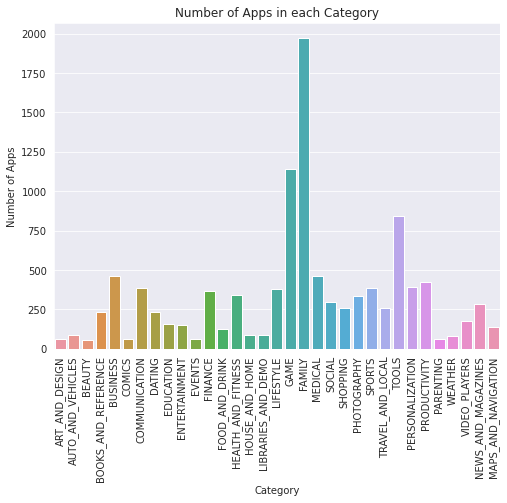

In [44]:

sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=df)
plt.title('Number of Apps in each Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

In [45]:
# CORRELATION BETWEEN RATING AND INSTALL
print(df['Rating'].corr(df['Installs']))
print(df['Rating'].corr(df['Size']))
print(df['Rating'].corr(df['Price']))


0.055835348745672066
0.04998834029825421
-0.020835442499074625


# 2. MOST OF THE APPS FALLS UNDER WHICH GENRE

In [46]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [47]:
df['Genres'].value_counts().head(10)

Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    392
Communication      387
Lifestyle          381
Name: Genres, dtype: int64

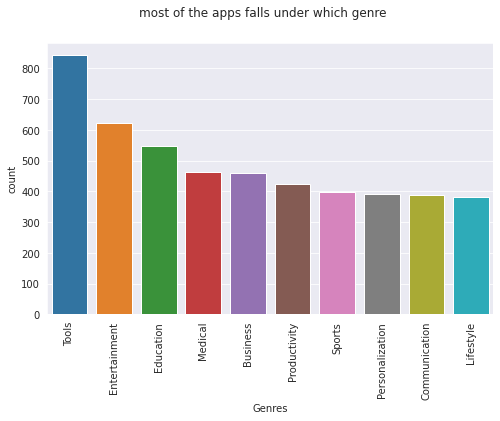

In [48]:
fig,ax1 = plt.subplots(figsize = (8,5))
plt.suptitle("most of the apps falls under which genre")
plt.xticks(rotation = 90)
sns.countplot( x  = "Genres",data = df,ax = ax1, order = df['Genres'].value_counts().head(10).index)
plt.show()

Here from the above example we saw that most of the apps belongs to "Tools" Genres 

In [49]:
dfu = df[ df['Reviews'] > 50000].sort_values(by='Reviews')
dfu

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017.0,41.0,1.000000e+06,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
9677,Masha and The Bear Jam Day Match 3 games for kids,FAMILY,4.6,50060.0,98.0,1.000000e+06,Free,0.0,Everyone,Puzzle;Brain Games,"August 7, 2018",1.4.83,4.1 and up
8294,Bokeh (Background defocus),PHOTOGRAPHY,4.0,50109.0,0.0,1.000000e+07,Free,0.0,Everyone,Photography,"June 7, 2018",Varies with device,Varies with device
3098,Fantasy Football,SPORTS,3.5,50179.0,23.0,1.000000e+06,Free,0.0,Everyone,Sports,"August 2, 2018",2.5.7.1,5.0 and up
3046,Fantasy Football,SPORTS,3.5,50179.0,23.0,1.000000e+06,Free,0.0,Everyone,Sports,"August 2, 2018",2.5.7.1,5.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


# 3. NUMBER OF FREE AND PAID APPS IN EACH CAEGORY

In [50]:

df2 = pd.DataFrame().assign(Category=df['Category'], Type = df['Type'],Installs=df['Installs'])
print(df2)

                  Category  Type    Installs
0           ART_AND_DESIGN  Free     10000.0
1           ART_AND_DESIGN  Free    500000.0
2           ART_AND_DESIGN  Free   5000000.0
3           ART_AND_DESIGN  Free  50000000.0
4           ART_AND_DESIGN  Free    100000.0
...                    ...   ...         ...
10836               FAMILY  Free      5000.0
10837               FAMILY  Free       100.0
10838              MEDICAL  Free      1000.0
10839  BOOKS_AND_REFERENCE  Free      1000.0
10840            LIFESTYLE  Free  10000000.0

[10839 rows x 3 columns]


In [51]:
total1=  df.groupby("Category")['Type' ].count().reset_index()
total1

,Category,Type
0,ART_AND_DESIGN,65
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,231
4,BUSINESS,460
5,COMICS,60
6,COMMUNICATION,387
7,DATING,234
8,EDUCATION,156
9,ENTERTAINMENT,149


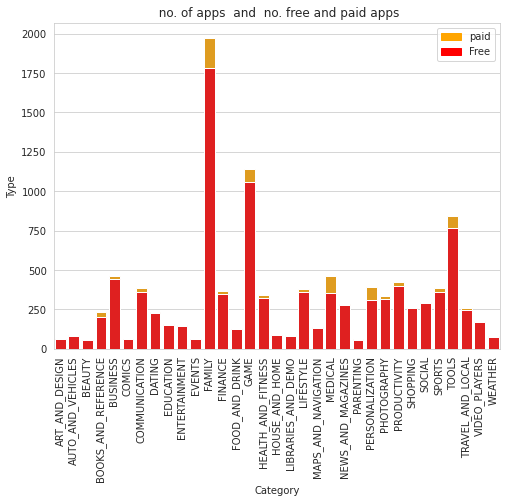

In [52]:
# 3. PLOT BARPLOT FOR FREE AND PAID APPS
sns.set_style("whitegrid")
total=  df.groupby("Category")['Type'].count().reset_index()
plt.figure(figsize = (8,6))
plt.xticks(rotation =90)

# plot chart for the total apps
sns.set_color_codes('pastel')
c1 = sns.barplot(x = "Category", y = "Type",data = total,color = 'orange')

# create a new data frame for paid 

free_apps = df[df.Type == 'Free']
free = free_apps.groupby('Category').count().reset_index()

# bargraph for free apss
c2 = sns.barplot(x = "Category", y = "Type",data = free,color = 'red')
plt.title("  no. of apps  and  no. free and paid apps ")

#ADD LEGEND
top = mp.Patch(color = "orange", label = "paid")
bot = mp.Patch(color = "red" , label = "Free")
plt.legend(handles = [top, bot])



In [53]:
"""free_apps = df[df.Type == 'Free']
free =free_apps.groupby('Category').count()['App'].sort_values(ascending = False)"""


"free_apps = df[df.Type == 'Free']\nfree =free_apps.groupby('Category').count()['App'].sort_values(ascending = False)"

In [54]:
df4 = pd.DataFrame().assign(Rating=df['Rating'],Installs=df['Installs'])
print(df4)

       Rating    Installs
0         4.1     10000.0
1         3.9    500000.0
2         4.7   5000000.0
3         4.5  50000000.0
4         4.3    100000.0
...       ...         ...
10836     4.5      5000.0
10837     5.0       100.0
10838     4.1      1000.0
10839     4.5      1000.0
10840     4.5  10000000.0

[10839 rows x 2 columns]


# 4. PERCENTAGE OF FREE AND PAID APPS

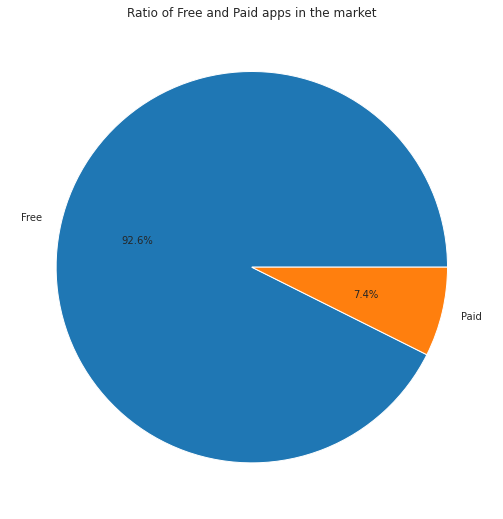

In [55]:
df.Type.value_counts().plot.pie(y = df.Type, figsize = (9,9), autopct = '%1.1f%%', title = 'Ratio of Free and Paid apps in the market',label = '');

# 5. NUMBER OF APPS INSTALLS IN EACH CATEGORY

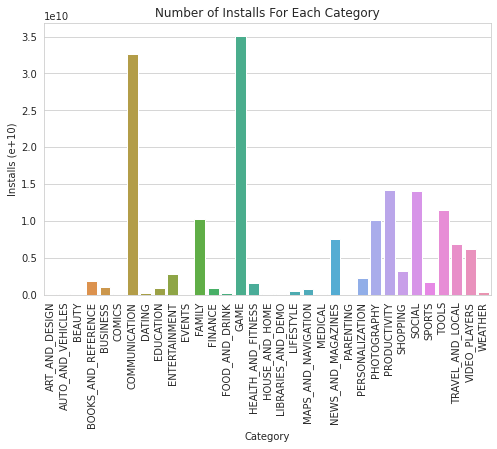

In [56]:
#2.  get the number of installs for each category
categories = df.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index () # to convert groupby object into dataframe

plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

# 6. DISTRIBUTION OF PAID APPS 

In [57]:
all_paid = df[df['Type'] == 'Paid']

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Installs'),
 Text(0.5, 1.0, 'Distribution of Installs (paid apps)')]

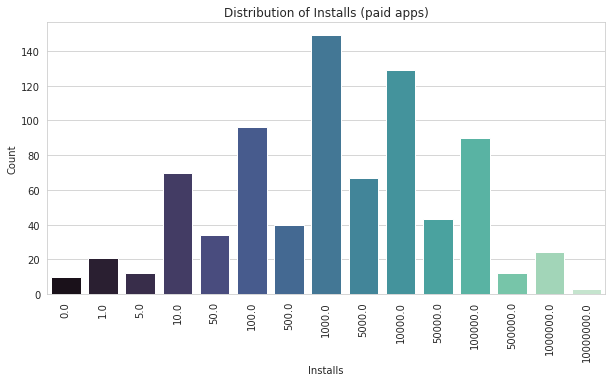

In [58]:
paid_counts = pd.DataFrame(all_paid['Installs'].value_counts())
plt.figure(figsize=(10, 5))
plt.xticks(rotation = 90)
sns.barplot(x=paid_counts.index, y=paid_counts['Installs'], palette='mako').set(xlabel='Installs', ylabel='Count', title='Distribution of Installs (paid apps)')

# 7. DISTRIBUTION OF FREE APPS

In [59]:
df = df[df['Installs'] != 'Free']

In [60]:
all_free = df[df['Type'] == 'Free']

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Installs'),
 Text(0.5, 1.0, 'Distribution of Installs (free apps)')]

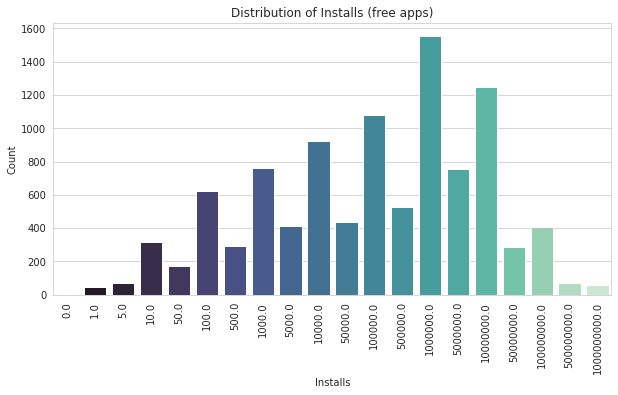

In [61]:
free_counts = pd.DataFrame(all_free['Installs'].value_counts())
plt.figure(figsize=(10, 5))
plt.xticks(rotation = 90)
sns.barplot(x=free_counts.index, y=free_counts['Installs'], palette='mako').set(xlabel='Installs', ylabel='Count', title='Distribution of Installs (free apps)')

# 8. TOP 10 INSTALLED APP IN SPORTS CATEGORY

In [62]:
def findtop10incategory(str):
    str = str.upper()
    top10 = df[df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(8,8))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 90, horizontalalignment='right');

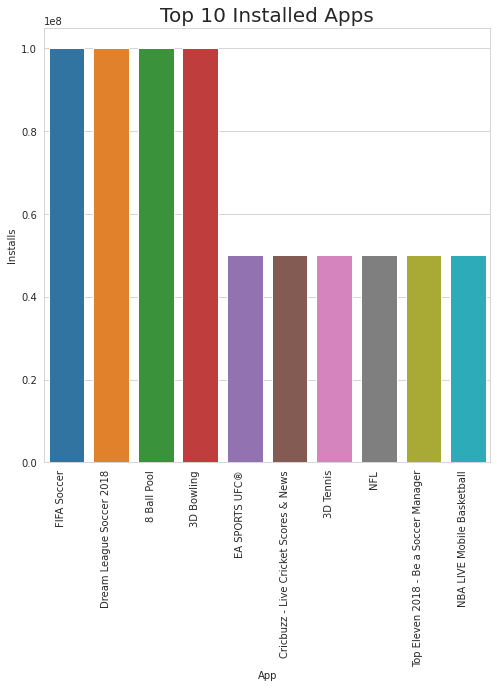

In [63]:
# bargraph for  top 10 installed apps in sports category
findtop10incategory('Sports')

# 9. TOP 10 PAID APPS

In [64]:
# top ten paid apps 
top_10_paid_apps = df[df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)
top_10_paid_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.300000,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,0.942383,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36.0,41.000000,1000.0,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.1,0.0,40.000000,0.0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8.700000,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1.800000,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5358,I am Rich!,FINANCE,3.8,93.0,22.000000,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5362,I Am Rich Pro,FAMILY,4.4,201.0,2.700000,5000.0,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26.000000,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129.0,2.700000,1000.0,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up


In [65]:
top_10_paid_apps = top_10_paid_apps[['App', 'Installs']].drop(9934)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


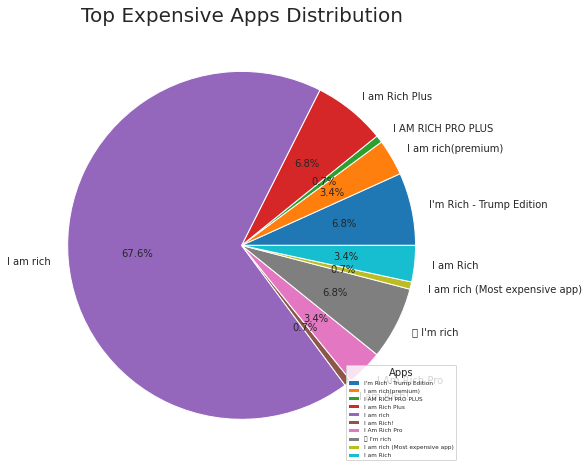

In [66]:
plt.figure(figsize=(9,8));
plt.pie(top_10_paid_apps.Installs, explode=None, labels=top_10_paid_apps.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top_10_paid_apps.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

# 10.AVERAGE PRICE OF PAID APPS IN EACH CATEGORY

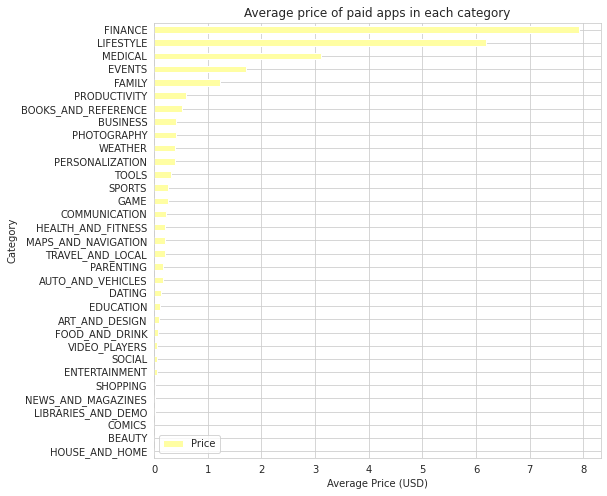

In [67]:

df.groupby('Category')['Price'].mean().sort_values(ascending=False).plot.barh(figsize = (8,8), color='y').invert_yaxis()
plt.xlabel('Average Price (USD)')
plt.title('Average price of paid apps in each category')
plt.legend()

# 11. TOTAL PRICE IN EACH CATEGORY(SUM)

In [68]:
# category wise priec:

cat_price = df.groupby('Category')
y=cat_price['Price'].agg(np.sum)
y

Category
ART_AND_DESIGN            5.97
AUTO_AND_VEHICLES        13.47
BEAUTY                    0.00
BOOKS_AND_REFERENCE     119.77
BUSINESS                185.27
COMICS                    0.00
COMMUNICATION            83.14
DATING                   31.43
EDUCATION                17.96
ENTERTAINMENT             7.98
EVENTS                  109.99
FAMILY                 2434.78
FINANCE                2900.83
FOOD_AND_DRINK            8.48
GAME                    287.30
HEALTH_AND_FITNESS       67.34
HOUSE_AND_HOME            0.00
LIBRARIES_AND_DEMO        0.99
LIFESTYLE              2360.87
MAPS_AND_NAVIGATION      26.95
MEDICAL                1439.96
NEWS_AND_MAGAZINES        3.98
PARENTING                 9.58
PERSONALIZATION         153.96
PHOTOGRAPHY             134.21
PRODUCTIVITY            250.93
SHOPPING                  5.48
SOCIAL                   15.97
SPORTS                  100.00
TOOLS                   267.25
TRAVEL_AND_LOCAL         49.95
VIDEO_PLAYERS            10.46

Text(0, 0.5, 'Price')

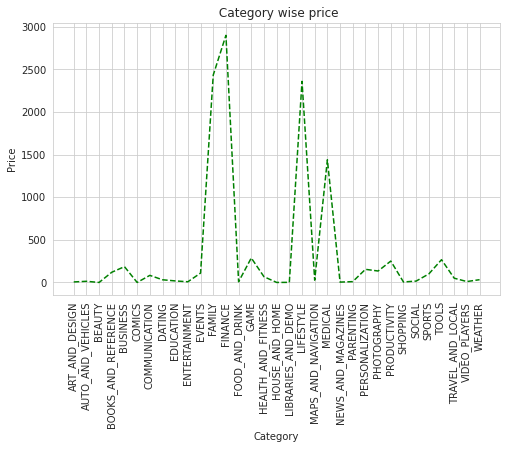

In [69]:
plt.figure(figsize =(8,5))
plt.plot(y,'r--',color = "green")
plt.xticks(rotation = 90)
plt.title(" Category wise price")
plt.xlabel("Category")
plt.ylabel("Price")

from above figure , we see that "finance" Category has high price as compared to others.


# 12. WHAT IS THE FREE AND PAID APPS SIZE (IN MB)

In [70]:
df.groupby('Type')['Size'].mean()

Type
Free    18.207730
Paid    17.472417
Name: Size, dtype: float64

Text(0.5, 0, 'TYPE')

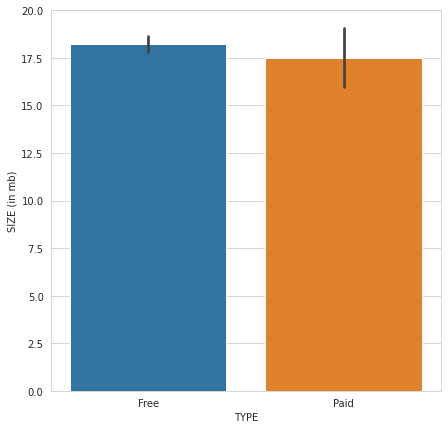

In [71]:
plt.figure(figsize = (7,7))
sns.barplot(x='Type', y='Size', data=df,estimator=np.mean)
plt.ylabel("SIZE (in mb)")
plt.xlabel("TYPE")

# 13. DATA SHAPE

In [72]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10839.000000,1.083900e+04,10839.000000,1.083900e+04,10839.000000
mean,4.179288,4.441939e+05,18.153458,1.546577e+07,1.027463
std,0.479960,2.927893e+06,22.171186,8.503315e+07,15.950436
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,2.600000,3.000000e+03,0.000000
50%,4.200000,2.094000e+03,9.200000,1.000000e+05,0.000000
75%,4.500000,5.478300e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


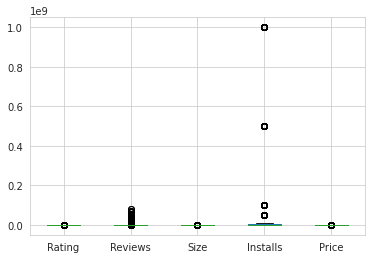

In [73]:
df.boxplot()

In [74]:
print(df['Size'].corr(df['Installs']))

-0.00346790732976557


#14. DISTRIBUTION OF RATING

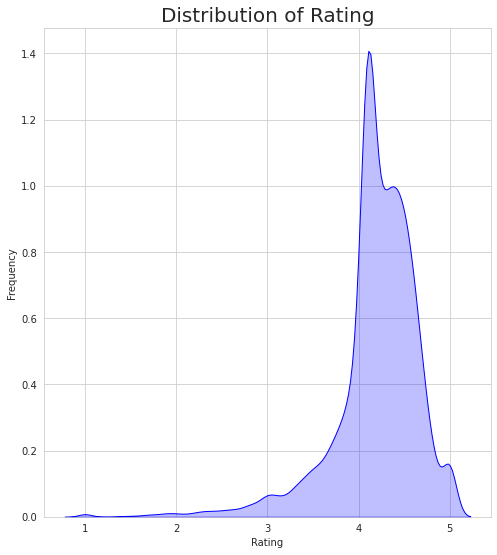

In [75]:
plt.figure(figsize=(8,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

#15. POINT PLOT OF AVERAGE RATING IN EACH CATEGORY

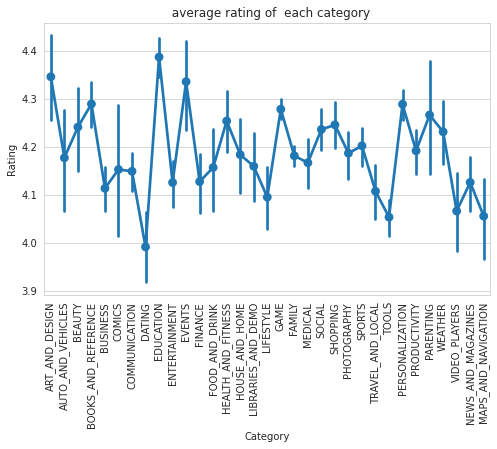

In [76]:
# plot point plot for average rating of each category

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
plt.title("  average rating of  each category")
sns.pointplot(x = "Category", y = "Rating", data = df)

In [77]:
dfr.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# 16. COUNTPLOT OF RATING(TOP10)

In [78]:
df["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [79]:
df['Rating'].value_counts().head(10)

4.1    2181
4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.0     568
4.7     499
3.9     386
3.8     303
Name: Rating, dtype: int64

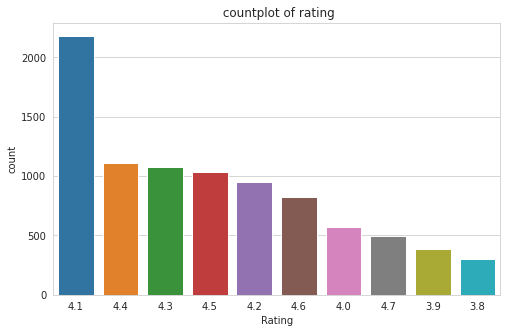

In [80]:
fig,ax2 = plt.subplots(figsize = (8,5))
sns.set_style("darkgrid")
plt.title(" countplot of rating")
sns.countplot(x = "Rating",data = df,ax = ax2, order = df["Rating"].value_counts().head(10).index)
plt.show()

# 17. PLOT THE BARGRAPH FOR CONTENT RATING

In [81]:




dft = df['Content Rating'].value_counts()
dft


Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Text(0.5, 1.0, 'Content Rating')

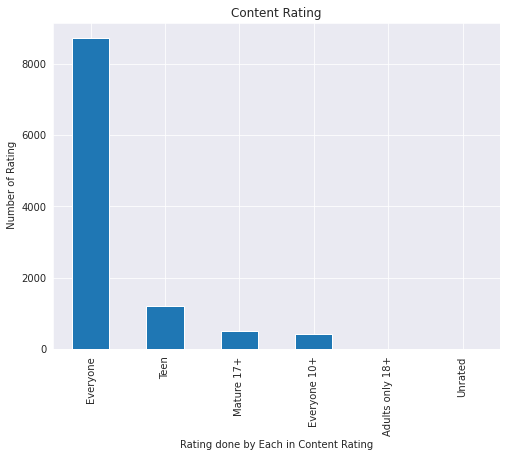

In [82]:
# plot bargraph for  content raing

plt.figure(figsize = (8,6))
dft.plot(kind="bar")
plt.ylabel(" Number of Rating")
plt.xlabel("Rating done by Each in Content Rating")
plt.title("Content Rating")

# 18.BARPLOT  DISPLAYING THE RATING FOR EACH CONTENT RATING

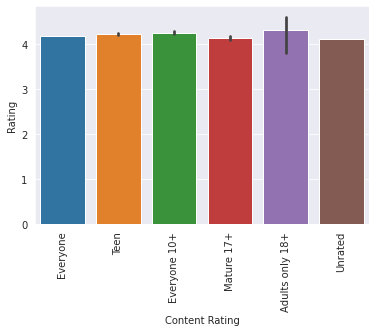

In [83]:
sns.barplot (x = "Content Rating", y = "Rating",data = df)
plt.xticks(rotation =90)
sns.set(rc = {'figure.figsize':(8,5)})

# 19.PLOTTING THE OVERALL SENTIMENT OF REVIEWS

In [84]:
dfr['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [85]:
#removal of null values in sentiment column
dfr.dropna(subset = ['Sentiment'], inplace = True)

In [86]:
dfr["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [87]:
dfr1 = dfr['Sentiment'].value_counts()
dfr1

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


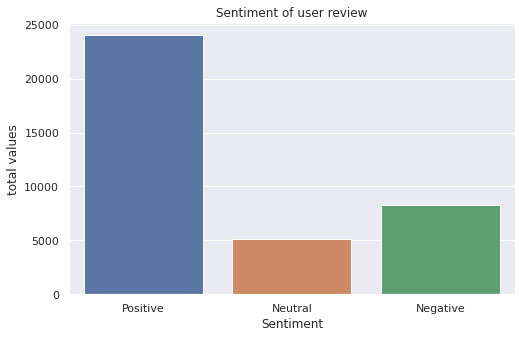

In [88]:
#sentiment of reviews
plt.figure(figsize=(8, 5))
sns.countplot(dfr['Sentiment'])

plt.title('Sentiment of user review')
plt.ylabel('total values')
plt.show()

## Top 10 earning apps

In [89]:
Paid_df= df[df['Type'] == 'Paid']

In [90]:
earn_df = df[['App', 'Installs', 'Price']]
earn_df

,App,Installs,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000.0,0.0
1,Coloring book moana,500000.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000.0,0.0
3,Sketch - Draw & Paint,50000000.0,0.0
4,Pixel Draw - Number Art Coloring Book,100000.0,0.0
...,...,...,...
10836,Sya9a Maroc - FR,5000.0,0.0
10837,Fr. Mike Schmitz Audio Teachings,100.0,0.0
10838,Parkinson Exercices FR,1000.0,0.0
10839,The SCP Foundation DB fr nn5n,1000.0,0.0


In [91]:
earn_df['Earnings'] = earn_df['Installs'] * earn_df['Price'];

<ipython-input-91-cb4cdc39acdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earn_df['Earnings'] = earn_df['Installs'] * earn_df['Price'];


In [92]:
earn_df_sort_by_Earnings = earn_df.sort_values(by='Earnings', ascending=False).head(50)

In [93]:
earn_df_sort_by_Price = earn_df_sort_by_Earnings.sort_values(by='Price', ascending=False)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


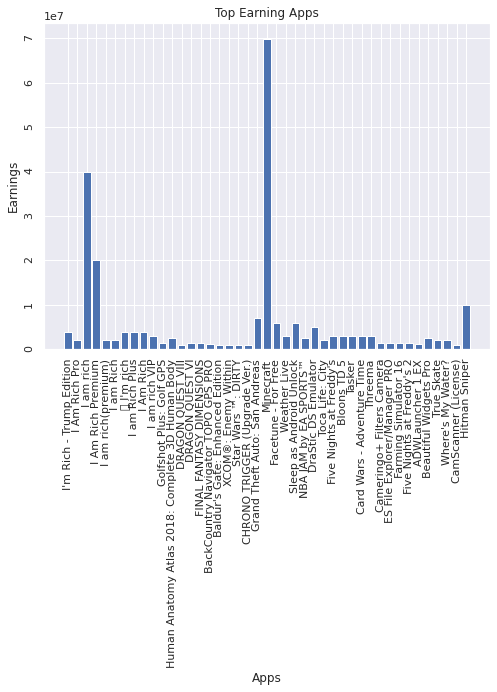

In [94]:
# plot a bar chart for top 5 earning apps
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
plt.bar(earn_df_sort_by_Price.App, earn_df_sort_by_Price.Earnings, label=earn_df_sort_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

here from the above grpah we can easily see that the top 5 earning apps are:-
1)Minecraft
2)I am rich 
3)I am rich (premium)
4)hitman sniper
5)GTA: sandreas


In [95]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=True)


Category
DATING                 3.992308
TOOLS                  4.054211
MAPS_AND_NAVIGATION    4.056204
VIDEO_PLAYERS          4.066857
LIFESTYLE              4.095812
TRAVEL_AND_LOCAL       4.108140
BUSINESS               4.114130
ENTERTAINMENT          4.126174
NEWS_AND_MAGAZINES     4.126502
FINANCE                4.128142
COMMUNICATION          4.149612
COMICS                 4.153333
FOOD_AND_DRINK         4.157480
LIBRARIES_AND_DEMO     4.160000
MEDICAL                4.167387
AUTO_AND_VEHICLES      4.177647
FAMILY                 4.181786
HOUSE_AND_HOME         4.184091
PHOTOGRAPHY            4.187164
PRODUCTIVITY           4.192217
SPORTS                 4.202604
WEATHER                4.231707
SOCIAL                 4.236610
BEAUTY                 4.241509
SHOPPING               4.246154
HEALTH_AND_FITNESS     4.254252
PARENTING              4.266667
GAME                   4.278671
PERSONALIZATION        4.289031
BOOKS_AND_REFERENCE    4.289610
EVENTS                 4.335938

#20. TOP APPS HAVING HIGHER NUMBER OF REVIEWS

In [96]:
# Apps with higheer numbe rof reviews

high_rev_apps = df.sort_values(by='Reviews', ascending=False).head(50)

In [97]:
high_rev_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device


Text(0.5, 1.0, ' **top apps having higher no. of reviews**')

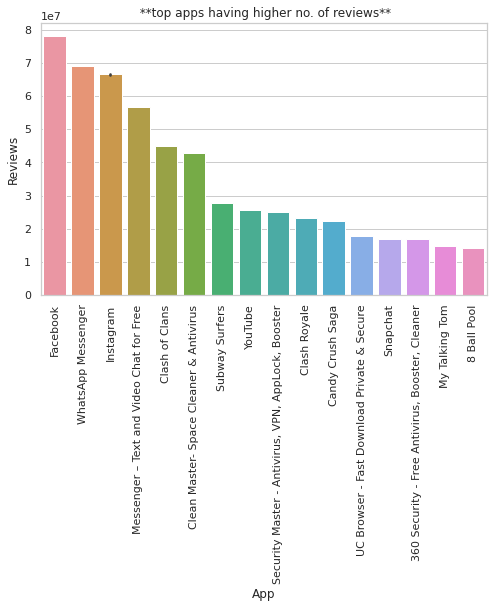

In [98]:
plt.figure(figsize = (8,5))
sns.set_style("whitegrid")
plt.xticks(rotation = 90)
sns.barplot(x = 'App', y = 'Reviews', data = high_rev_apps)
plt.title(" **top apps having higher no. of reviews**")


#21. PLOTTING OF POSITIVE REVIEWS

In [99]:

positive_reviews_df = dfr[dfr['Sentiment'] == 'Positive']
positive_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


Text(0.5, 1.0, 'Apps with the highest number of positive reviews')

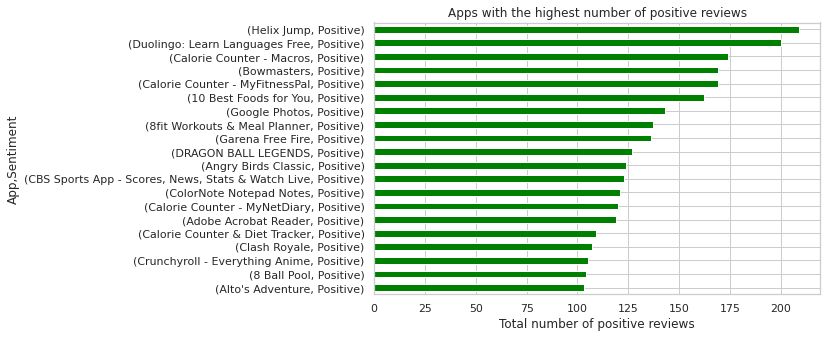

In [100]:

positive_reviews_df.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(8,5), color='green').invert_yaxis()
plt.xlabel('Total number of positive reviews')
plt.title('Apps with the highest number of positive reviews')

# 22. WORD CLOUD FOR POSITIVE REVIEWS

In [101]:
from wordcloud import WordCloud, STOPWORDS

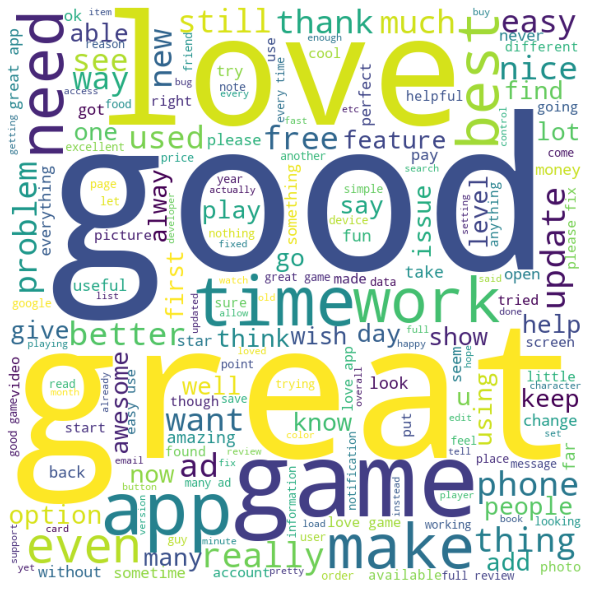

In [102]:
review_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in positive_reviews_df.Translated_Review.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    review_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(review_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# 23. PLOTTING OF NEGATIVE REVIEWS

In [103]:
negative_reviews_df = dfr[dfr['Sentiment'] == 'Negative']
negative_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


Text(0.5, 1.0, 'Apps with the highest number of negative reviews')

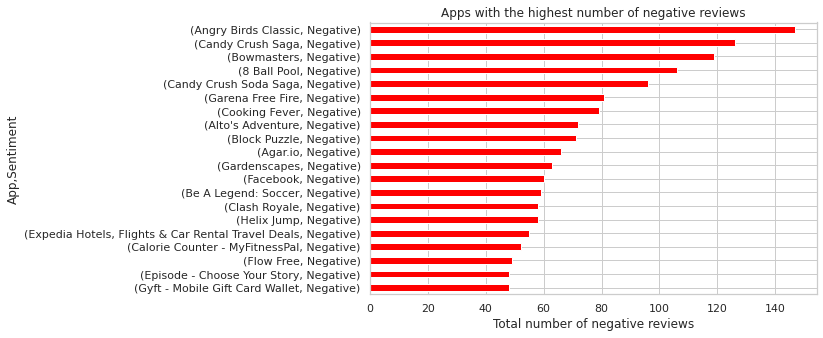

In [104]:
#plotting of negative reviews
negative_reviews_df.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(8,5), color='red').invert_yaxis()
plt.xlabel('Total number of negative reviews')
plt.title('Apps with the highest number of negative reviews')

# 24. WORD CLOUD OF NEGATIVE REVIEWS


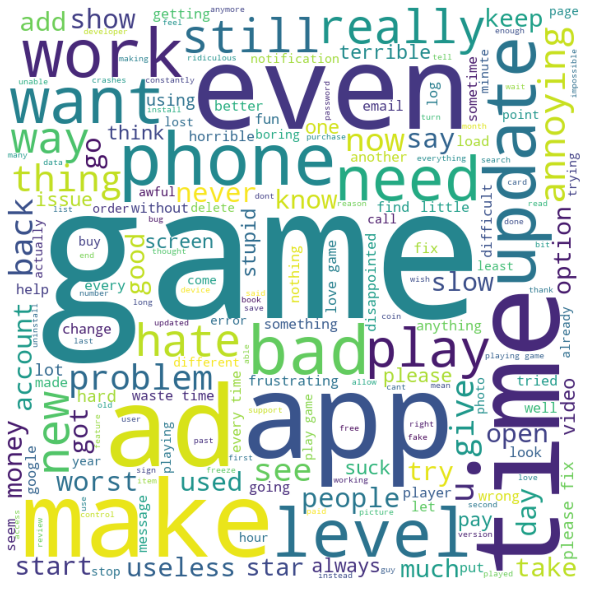

In [105]:
review_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in negative_reviews_df.Translated_Review.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    review_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(review_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# 25. CORELATION BETWEEN RATING,REVIEWS,SIZE AND INSTALLS

In [106]:
df.loc[0:10842,['Size','Installs']]

,Size,Installs
0,19.0,10000.0
1,14.0,500000.0
2,8.7,5000000.0
3,25.0,50000000.0
4,2.8,100000.0
...,...,...
10836,53.0,5000.0
10837,3.6,100.0
10838,9.5,1000.0
10839,0.0,1000.0


In [107]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.071814,0.049988,0.055835,-0.020835
Reviews,0.071814,1.000000,0.065450,0.643121,-0.009668
Size,0.049988,0.065450,1.000000,-0.003468,-0.013464
Installs,0.055835,0.643121,-0.003468,1.000000,-0.011691
Price,-0.020835,-0.009668,-0.013464,-0.011691,1.000000


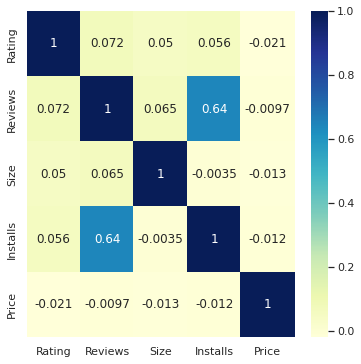

In [108]:
plt.figure(figsize = (6,6))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [109]:
dfy=df.groupby(['Category'])['Rating'].mean()
dfy

Category
ART_AND_DESIGN         4.346154
AUTO_AND_VEHICLES      4.177647
BEAUTY                 4.241509
BOOKS_AND_REFERENCE    4.289610
BUSINESS               4.114130
COMICS                 4.153333
COMMUNICATION          4.149612
DATING                 3.992308
EDUCATION              4.387179
ENTERTAINMENT          4.126174
EVENTS                 4.335938
FAMILY                 4.181786
FINANCE                4.128142
FOOD_AND_DRINK         4.157480
GAME                   4.278671
HEALTH_AND_FITNESS     4.254252
HOUSE_AND_HOME         4.184091
LIBRARIES_AND_DEMO     4.160000
LIFESTYLE              4.095812
MAPS_AND_NAVIGATION    4.056204
MEDICAL                4.167387
NEWS_AND_MAGAZINES     4.126502
PARENTING              4.266667
PERSONALIZATION        4.289031
PHOTOGRAPHY            4.187164
PRODUCTIVITY           4.192217
SHOPPING               4.246154
SOCIAL                 4.236610
SPORTS                 4.202604
TOOLS                  4.054211
TRAVEL_AND_LOCAL       4.108140